In [1]:
from dolfin import *
#Meshandfunctionspace
import matplotlib.pyplot as plt
import NS_solver as ns 
import numpy as np

import GenerateData as gd

In [2]:
!dolfin-convert data/mesh/bifurcation.msh data/mesh/bifurcation.xml

Converting from Gmsh format (.msh, .gmsh) to DOLFIN XML format
Expecting 11100 vertices
Found all vertices
Expecting 21006 cells
Found all cells
Conversion done


In [3]:
mesh_load = gd.MeshLoader("data/mesh/DD")
mesh = mesh_load.mesh
bounds = mesh_load.bounds
face = mesh_load.face

In [4]:
#tags = {'walls': [2], 'inlet':[1], 'outlet': [3], 'interface': [4,5,6,7], 'faces': [8,9,10,11,12]}
tags = {'walls':[5],'inlet':[6],'outlet':[7], 'interface': [8,9,10], 'faces': [11,12,13,14]}
mesh_load.update_tags(tags)
mesh_load.measure_definition()

(Measure('interior_facet', subdomain_id='everywhere', domain=Mesh(VectorElement(FiniteElement('Lagrange', triangle, 1), dim=2), 0), subdomain_data=<dolfin.cpp.mesh.MeshFunctionSizet object at 0x7f51d2024070>),
 Measure('exterior_facet', subdomain_id='everywhere', domain=Mesh(VectorElement(FiniteElement('Lagrange', triangle, 1), dim=2), 0), subdomain_data=<dolfin.cpp.mesh.MeshFunctionSizet object at 0x7f51d2024070>),
 Measure('cell', subdomain_id='everywhere', domain=Mesh(VectorElement(FiniteElement('Lagrange', triangle, 1), dim=2), 0), subdomain_data=<dolfin.cpp.mesh.MeshFunctionSizet object at 0x7f51d20266f0>))

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Solving linear variational problem.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Object cannot be plotted directly, projecting to piecewise linears.
Calling FFC just-in-time (JIT) compiler, this may take some time.


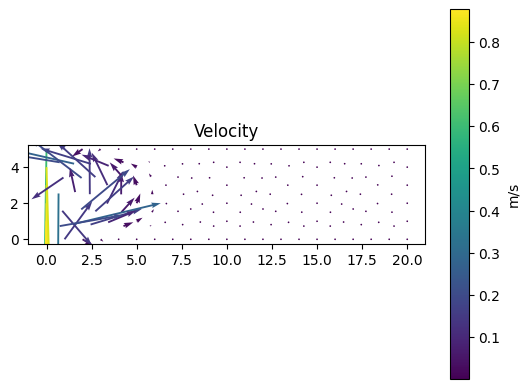

Calling FFC just-in-time (JIT) compiler, this may take some time.
Object cannot be plotted directly, projecting to piecewise linears.
Calling FFC just-in-time (JIT) compiler, this may take some time.


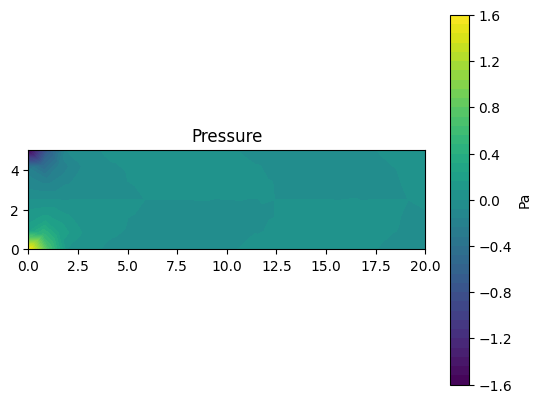

In [5]:
ns = gd.Stokes(mesh_load,'Navier-Stokes')
ns.solve()
ns.plot_solution()

In [6]:
data = gd.DataNS(ns,mesh_load)
flux = data.flux(tags['interface'][0])
print(flux)

Calling FFC just-in-time (JIT) compiler, this may take some time.
3.519742174020596e-05


In [7]:
center_line = []
tags_list = ['inlet','interface','outlet']
for j in tags_list:
    for i in tags[j]:
        edge_coord =[]
        for edge in edges(mesh):
            if bounds.array()[edge.index()] == i:
                for vertex in vertices(edge):
                    coordinate = vertex.point().array()
                    edge_coord.append(coordinate)

        edge_coord = np.array(edge_coord)
        center_line.append([(np.max(edge_coord[:,0])+np.min(edge_coord[:,0]))/2,(np.max(edge_coord[:,1])+np.min(edge_coord[:,1]))/2])

print(center_line)

[[0.0, 2.5], [5.0, 2.5], [10.0, 2.5], [15.0, 2.5], [20.0, 2.5]]
